<a href="https://colab.research.google.com/github/Vicente836/Practica-Ihealth/blob/S2/Algoritmo_ATLAS_n_modos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creación datos test

In [1]:
try:
    import gmsh
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/gmsh-install.sh" -O "/tmp/gmsh-install.sh" && bash "/tmp/gmsh-install.sh"
    import gmsh

--2024-12-12 12:12:35--  https://fem-on-colab.github.io/releases/gmsh-install.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3497 (3.4K) [application/x-sh]
Saving to: ‘/tmp/gmsh-install.sh’

/tmp/gmsh-install.s 100%[===================>]   3.42K  --.-KB/s    in 0s      

2024-12-12 12:12:35 (34.2 MB/s) - ‘/tmp/gmsh-install.sh’ saved [3497/3497]

+ INSTALL_PREFIX=/usr/local
++ awk -F/ '{print NF-1}'
++ echo /usr/local
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ GMSH_INSTALLED=/usr/local/share/fem-on-colab/gmsh.installed
+ [[ ! -f /usr/local/share/fem-on-colab/gmsh.installed ]]
+ H5PY_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/bc474259/releases/h5py-install.sh
+ [[ https://gith

In [2]:
!pip install meshio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.2/166.2 kB 3.6 MB/s eta 0:00:00


In [3]:
!pip install ukb-atlas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.4/68.4 kB 2.0 MB/s eta 0:00:00


In [4]:
!apt-get install -qq xvfb libgl1-mesa-glx
!pip install pyvista -qq

Selecting previously unselected package libfontenc1:amd64.
(Reading database ... 123633 files and directories currently installed.)
Preparing to unpack .../0-libfontenc1_1%3a1.1.4-1build3_amd64.deb ...
Unpacking libfontenc1:amd64 (1:1.1.4-1build3) ...
Selecting previously unselected package libgl1-mesa-glx:amd64.
Preparing to unpack .../1-libgl1-mesa-glx_23.0.4-0ubuntu1~22.04.1_amd64.deb ...
Unpacking libgl1-mesa-glx:amd64 (23.0.4-0ubuntu1~22.04.1) ...
Selecting previously unselected package libxfont2:amd64.
Preparing to unpack .../2-libxfont2_1%3a2.0.5-1build1_amd64.deb ...
Unpacking libxfont2:amd64 (1:2.0.5-1build1) ...
Selecting previously unselected package libxkbfile1:amd64.
Preparing to unpack .../3-libxkbfile1_1%3a1.1.0-1build3_amd64.deb ...
Unpacking libxkbfile1:amd64 (1:1.1.0-1build3) ...
Selecting previously unselected package x11-xkb-utils.
Preparing to unpack .../4-x11-xkb-utils_7.7+5build4_amd64.deb ...
Unpacking x11-xkb-utils (7.7+5build4) ...
Selecting previously unselec

In [5]:
import pyvista
pyvista.set_jupyter_backend('static')
pyvista.global_theme.notebook = True
pyvista.start_xvfb()

In [6]:
import pyvista as pv
import os
#import tetgen
import numpy as np
import random

# Generación datos (-1.5 veces la desv. stand. del tercer modo)

In [7]:
!ukb-atlas 'heart_meshs' --mesh -m 2 -s -1.5 --subdir 'heart_1'

INFO:ukb.atlas:Downloading https://www.cardiacatlas.org/share/download.php?id=60&token=AR3JSoaxJ9Ev9n8QAkvV4BHJUniyttqm&download to heart_meshs/UKBRVLV.zip. This may take a while.
INFO:ukb.atlas:Done downloading.
INFO:ukb.atlas:Generating points from heart_meshs/UKBRVLV.h5 using mode 2 and std -1.5
INFO:ukb.mesh:Creating mesh for ED with char_length_max=5.0, char_length_min=5.0
INFO:ukb.mesh:Created mesh heart_meshs/heart_1/ED.msh
INFO:ukb.mesh:Creating mesh for ES with char_length_max=5.0, char_length_min=5.0
INFO:ukb.mesh:Created mesh heart_meshs/heart_1/ES.msh


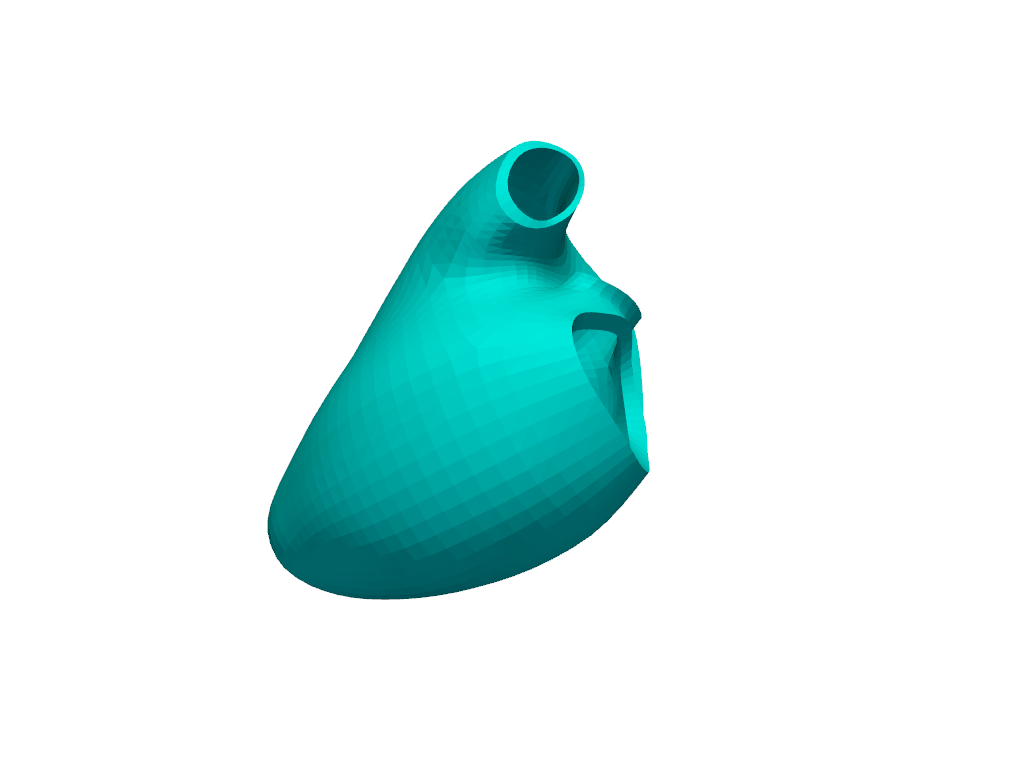

In [8]:
files_list = ['heart_meshs/heart_1/AV_ED.stl', 'heart_meshs/heart_1/EPI_ED.stl', 'heart_meshs/heart_1/LV_ED.stl',
              'heart_meshs/heart_1/MV_ED.stl', 'heart_meshs/heart_1/PV_ED.stl', 'heart_meshs/heart_1/RVFW_ED.stl',
              'heart_meshs/heart_1/RV_ED.stl', 'heart_meshs/heart_1/TV_ED.stl']
mesh_list = [pv.read(f) for f in files_list]
mesh_ED = pv.merge(mesh_list)
#tet_mesh_ED = tetgen.TetGen(mesh_ED)
#tet_mesh_ED.tetrahedralize(order=1, mindihedral=10, minratio=1.5)
mesh_ED["val"] = np.ones_like(mesh_ED.points[:, 0])
p = pv.Plotter()
p.add_mesh(mesh_ED, color = 'cyan')
#p.add_mesh(ED_inter, color = 'cyan')
p.show()

In [9]:
#creamos nube de puntos sampleando aleatoriamente de slices del corazon
def point_cloud(slices):
  point_cloud = []
  for i, sl in enumerate(slices):
    n = len(sl.points)
    #id = np.random.choice(range(0, n), 0.1*n), replace=False)
    points = sl.points
    point_cloud.extend(points)
  return pv.PolyData(point_cloud)

# Algoritmo ICP con modelo del atlas

In [11]:
from scipy.spatial import cKDTree

In [113]:
alpha_real = np.array([0.0,0.0,-1.5,0.0,0.0])

def create_heart_ATLAS(alpha, pc):
  n = len(alpha)
  # Create the n principal modes with alpha[i] times the standard deviation each

  S = np.transpose(pc['MU']) + sum( alpha[i]*np.sqrt(pc['LATENT'][0,i])*pc['COEFF'][i,:] for i in range(n))
  # get ED & convert to 3 columns matrix [x, y, z]
  N = S.shape[1] // 2
  ed = np.reshape(S[0,:N], (-1,3))
  return np.array(ed)

def loss(alpha, data_points, pc):
  X_points = create_heart_ATLAS(alpha, pc)
  tree = cKDTree(X_points)
  idx_cp = tree.query(data_points)[1]
  return 0.5*np.mean(np.sum((X_points[idx_cp]- data_points)**2, axis = 1))

def gradloss(alpha, data_points, pc):
  n = len(alpha)
  X_points = create_heart_ATLAS(alpha, pc)
  tree = cKDTree(X_points)
  idx_cp = tree.query(data_points)[1]
  N = data_points.shape[0]
  valp = pc['LATENT'][0,0:n]
  vecp = pc['COEFF'][0:n,:]
  k = vecp[0].shape[0] // 2
  vecp_ED = vecp[:,:k]
  vecp_ED_resh= np.array([np.reshape(v, (-1,3)) for v in vecp_ED ])
  grad = np.zeros(n)
  for i in range(n):
    grad[i] = (1/N)*np.dot((X_points[idx_cp] - data_points).flatten(), ((vecp_ED_resh[i])[idx_cp]).flatten()*np.sqrt(valp[i]))
  return grad

# algorithm that optimize parameters for PCA
def ATLAS_ICP(data_points, pc, n_modes = 5, N_iter=5, lr=0.05):
  # start with mean shape of the PCA
  alpha_ = np.zeros(n_modes)
  print('Valor de alpha inicial: ' + str(alpha_))
  loss_rec = []
  loss_real_rec = []
  for i in range(N_iter):
    grad = gradloss(alpha_, data_points, pc)
    alpha_ = alpha_ - lr * grad
    loss_ = loss(alpha_, data_points, pc)
    loss_rec.append(loss_)
    opt_points = create_heart_ATLAS(alpha_, pc)
    loss_real = loss(alpha_real, opt_points,pc)
    loss_real_rec.append(loss_real)
  print('Valor de alpha final: ' + str(alpha_))
  print('Loss mínimo:' + str(min(loss_rec)))
  return alpha_, loss_rec, loss_real_rec

# Algoritmo usando mínimos cuadrados

In [13]:
from numpy.linalg import lstsq

In [115]:
alpha_real = np.array([0.0,0.0,-1.5,0.0,0.0])

def loss(alpha, data_points, pc):
  X_points = create_heart_ATLAS(alpha, pc)
  tree = cKDTree(X_points)
  idx_cp = tree.query(data_points)[1]
  return 0.5*np.mean(np.sum((X_points[idx_cp]- data_points)**2, axis = 1))

def lstsq_ATLAS(alpha, data_points, pc):
  n = len(alpha)
  X_points = create_heart_ATLAS(alpha, pc)
  tree = cKDTree(X_points)
  idx_cp = tree.query(data_points)[1]

  # procesamiento para tener las coordenadas de los vectores propios correspondientes a los cp
  N = data_points.shape[0]
  valp = pc['LATENT'][0,0:n]
  vecp = pc['COEFF'][0:n,:]
  k = vecp[0].shape[0] // 2
  vecp_ED = vecp[:,:k]
  vecp_ED_resh= np.array([np.reshape(v, (-1,3)) for v in vecp_ED ])
  vecp_ED_cp = (vecp_ED_resh[:, idx_cp]).reshape(n,-1)
  vecp_ED_cp_valp = np.array([np.sqrt(valp[i])*vecp_ED_cp[i] for i in range(n)] ) # multiplicamos por valores coeficientes 'latent'
  # coordenadas del modelo promedio asociadas a los cp
  mu = pc['MU']
  mu_ED = np.reshape(mu[:k], (-1,3))
  mu_ED_cp = mu_ED[idx_cp]

  alpha_, _, _, _ = lstsq(vecp_ED_cp_valp.T, (data_points-mu_ED_cp).flatten(), rcond=False)
  return alpha_

# algorithm that optimize parameters for PCA
def ATLAS_ICP_LS(data_points, pc, n_modes = 5, N_iter=5):
  # start with mean shape of the PCA
  alpha_ = np.zeros(n_modes)
  print('Valor de alpha inicial: ' + str(alpha_))
  loss_rec = []
  loss_real_rec = []
  for i in range(N_iter):
    alpha_  = lstsq_ATLAS(alpha_, data_points, pc)
    loss_ = loss(alpha_, data_points, pc)
    loss_rec.append(loss_)
    opt_points = create_heart_ATLAS(alpha_, pc)
    loss_real = loss(alpha_real, opt_points,pc)
    loss_real_rec.append(loss_real)
  print('Valor de alpha final: ' + str(alpha_))
  print('Loss mínimo:' + str(min(loss_rec)))
  return alpha_, loss_rec, loss_real_rec

# Test del algoritmo

## Prueba usando 10 slices

In [81]:
import h5py as h5
import matplotlib.pyplot as plt

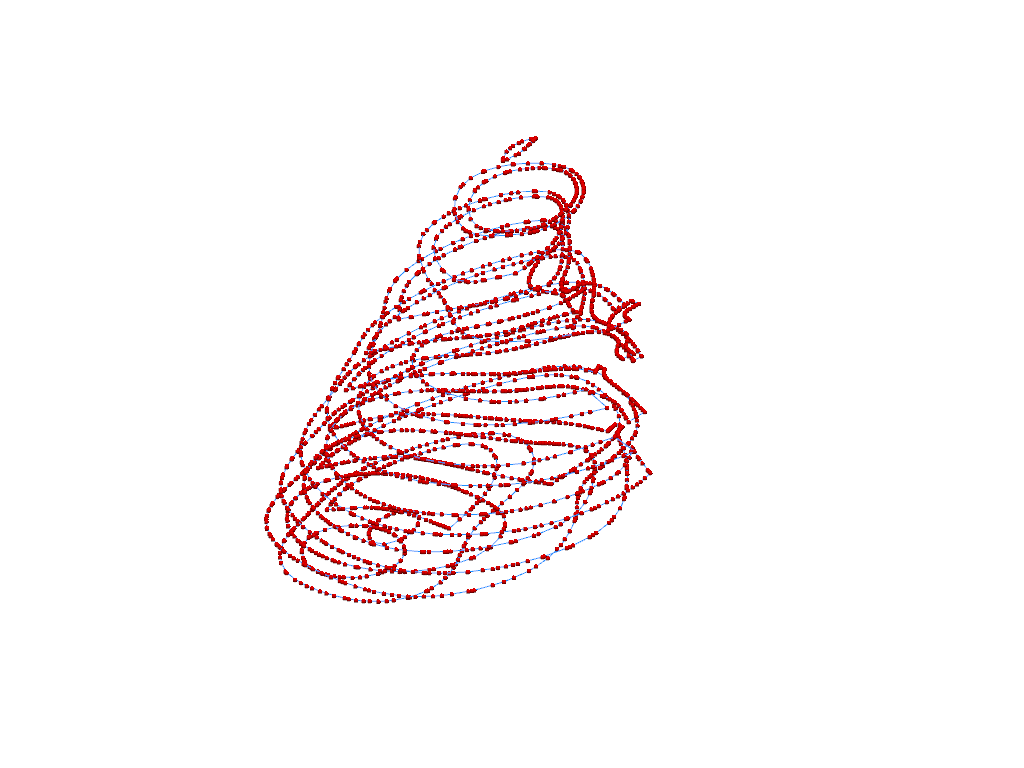

In [154]:
#ED_interp = bg.sample(grid)
slices = mesh_ED.slice_along_axis(n=10, axis="z")
data = point_cloud(slices)
p = pv.Plotter()
p.add_mesh(data, render_points_as_spheres=True, color = 'red')
p.add_mesh(slices, color = 'dodgerblue', show_edges = True)
p.show()

In [155]:
alpha_true = np.array([0.0,0.0,-1.5, 0.0, 0.0])
pc = h5.File('UKBRVLV.h5', 'r')
data_points = data.points
modes = 5
num_iter = 100

print('// Algoritmo con gradiente descendiente //')
alpha_opt_gd_10, loss_rec_gd_10, loss_real_rec_gd_10 = ATLAS_ICP(data_points, pc, n_modes=modes, N_iter=num_iter, lr=0.2)
opt_points_gd_10 = create_heart_ATLAS(alpha_opt_gd_10, pc)
err_real_gd_10 = loss(alpha_true, opt_points_gd_10, pc)
print('Error real: ' + str(err_real_gd_10))

print('')
print('// Algoritmo con mínimos cuadrados de numpy //')
alpha_opt_ls_10, loss_rec_ls_10, loss_real_rec_ls_10  = ATLAS_ICP_LS(data_points, pc, n_modes=modes, N_iter=num_iter)
opt_points_ls_10 = create_heart_ATLAS(alpha_opt_ls_10, pc)
err_real_ls_10 = loss(alpha_true, opt_points_ls_10, pc)
print('Error real: ' + str(err_real_ls_10))

// Algoritmo con gradiente descendiente //
Valor de alpha inicial: [0. 0. 0. 0. 0.]
Valor de alpha final: [ 0.02915657 -0.04273356 -1.47152968 -0.01937315  0.02268654]
Loss mínimo:0.6547840932448683
Error real: 0.006630374470806635

// Algoritmo con mínimos cuadrados de numpy //
Valor de alpha inicial: [0. 0. 0. 0. 0.]
Valor de alpha final: [ 0.0148768  -0.02874924 -1.47805854 -0.01513969  0.0273618 ]
Loss mínimo:0.6540019609419215
Error real: 0.0025659535716597865


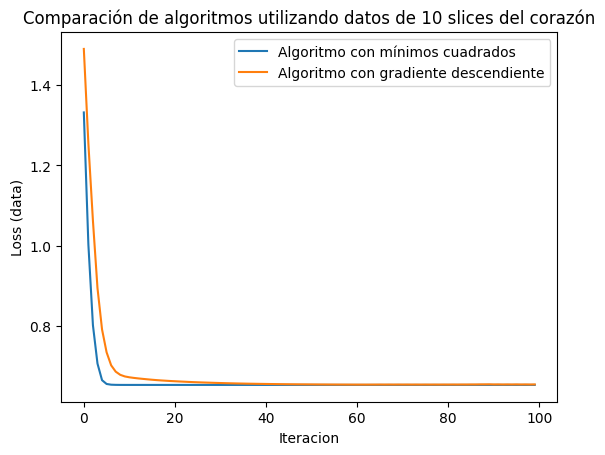

In [156]:
plt.plot(range(num_iter), loss_rec_ls_10, label = 'Algoritmo con mínimos cuadrados')
plt.plot(range(num_iter), loss_rec_gd_10, label = 'Algoritmo con gradiente descendiente')
plt.title('Comparación de algoritmos utilizando datos de 10 slices del corazón')
plt.xlabel('Iteracion')
plt.ylabel('Loss (data)')
plt.legend()
plt.show()

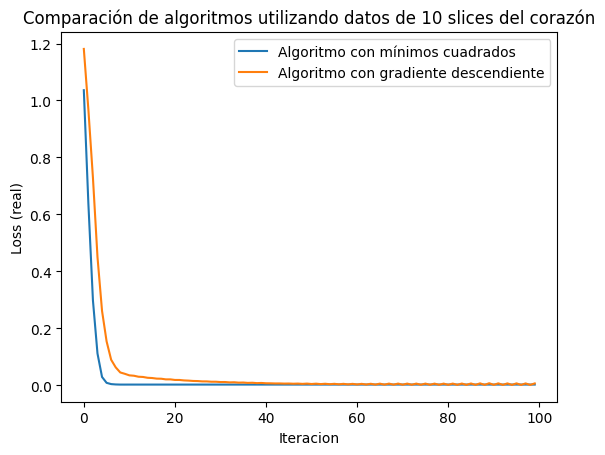

In [157]:
plt.plot(range(num_iter), loss_real_rec_ls_10, label = 'Algoritmo con mínimos cuadrados')
plt.plot(range(num_iter), loss_real_rec_gd_10, label = 'Algoritmo con gradiente descendiente')
plt.title('Comparación de algoritmos utilizando datos de 10 slices del corazón')
plt.xlabel('Iteracion')
plt.ylabel('Loss (real)')
plt.legend()
plt.show()

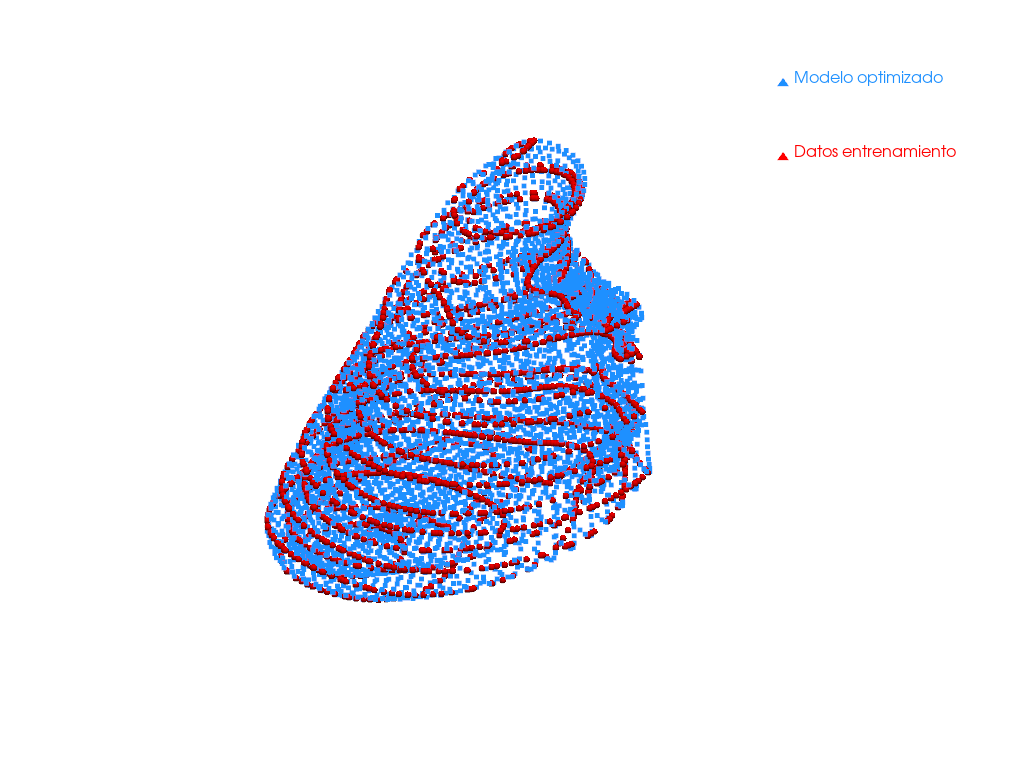

In [158]:
y = create_heart_ATLAS(alpha_opt_ls_10, pc)
z= create_heart_ATLAS(np.zeros(modes), pc)
opti = pv.PolyData(y)
naive = pv.PolyData(z)
p = pv.Plotter()
p.add_mesh(opti, color = 'dodgerblue', label='Modelo optimizado')
#p.add_mesh(naive, color='green', label = 'Modelo inicial (promedio)', opacity = 0.5)
p.add_mesh(data, point_size=7, render_points_as_spheres=True, color = 'red', label = 'Datos entrenamiento')
p.add_legend()
p.show()
#pv.save_meshio("optimizado.vtk", test)
#pv.save_meshio("datos.vtk", data)

## Prueba usando 5 slices

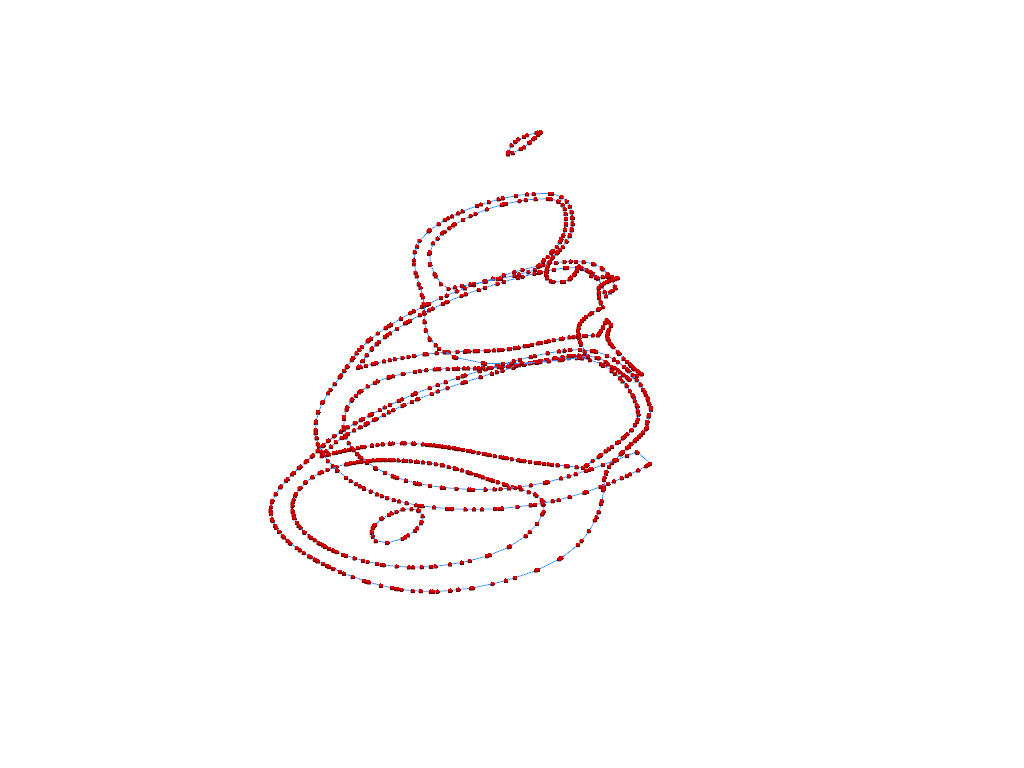

In [159]:
slices = mesh_ED.slice_along_axis(n=5, axis="z")
data = point_cloud(slices)
p = pv.Plotter()
p.add_mesh(data, render_points_as_spheres=True, color = 'red')
p.add_mesh(slices, color = 'dodgerblue', show_edges = True)
p.show()

In [160]:
alpha_true = np.array([0.0,0.0,-1.5, 0.0, 0.0])
pc = h5.File('UKBRVLV.h5', 'r')
data_points = data.points
modes = 5
num_iter = 100

print('// Algoritmo con gradiente descendiente //')
alpha_opt_gd_5, loss_rec_gd_5, loss_real_rec_gd_5 = ATLAS_ICP(data_points, pc, n_modes=modes, N_iter=num_iter, lr=0.2)
opt_points_gd_5 = create_heart_ATLAS(alpha_opt_gd_5, pc)
err_real_gd_5 = loss(alpha_true, opt_points_gd_5, pc)
print('Error real: ' + str(err_real_gd_5))

print('')
print('// Algoritmo con mínimos cuadrados de numpy //')
alpha_opt_ls_5, loss_rec_ls_5, loss_real_rec_ls_5  = ATLAS_ICP_LS(data_points, pc, n_modes=modes, N_iter=num_iter)
opt_points_ls_5 = create_heart_ATLAS(alpha_opt_ls_5, pc)
err_real_ls_5 = loss(alpha_true, opt_points_ls_5, pc)
print('Error real: ' + str(err_real_ls_5))

// Algoritmo con gradiente descendiente //
Valor de alpha inicial: [0. 0. 0. 0. 0.]
Valor de alpha final: [-0.00931049 -0.07152076 -1.48809536 -0.00754621  0.01121816]
Loss mínimo:0.6260399388052027
Error real: 0.00238467520302152

// Algoritmo con mínimos cuadrados de numpy //
Valor de alpha inicial: [0. 0. 0. 0. 0.]
Valor de alpha final: [ 8.81614919e-04 -5.45692766e-02 -1.50159840e+00 -9.45223191e-04
  1.34140629e-02]
Loss mínimo:0.6258048026684583
Error real: 0.002017306931660539


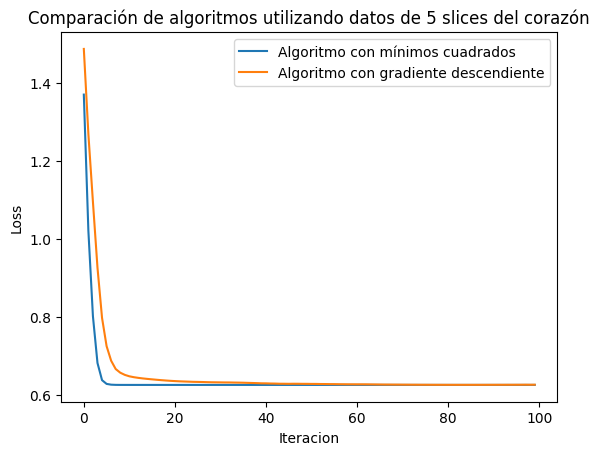

In [162]:
plt.plot(range(num_iter), loss_rec_ls_5, label = 'Algoritmo con mínimos cuadrados')
plt.plot(range(num_iter), loss_rec_gd_5, label = 'Algoritmo con gradiente descendiente')
plt.title('Comparación de algoritmos utilizando datos de 5 slices del corazón')
plt.xlabel('Iteracion')
plt.ylabel('Loss')
plt.legend()
plt.show()

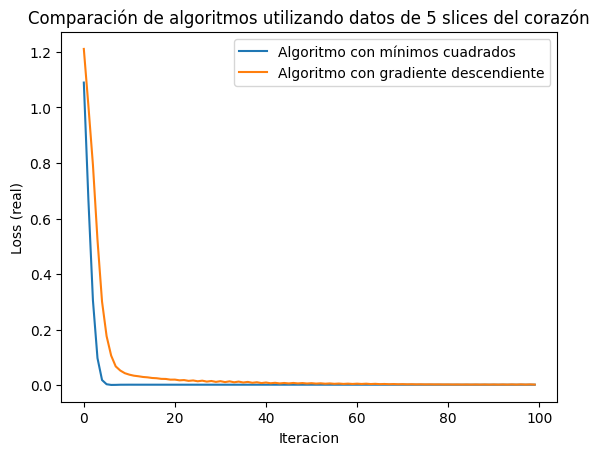

In [163]:
plt.plot(range(num_iter), loss_real_rec_ls_5, label = 'Algoritmo con mínimos cuadrados')
plt.plot(range(num_iter), loss_real_rec_gd_5, label = 'Algoritmo con gradiente descendiente')
plt.title('Comparación de algoritmos utilizando datos de 5 slices del corazón')
plt.xlabel('Iteracion')
plt.ylabel('Loss (real)')
plt.legend()
plt.show()

## Prueba usando 3 slices

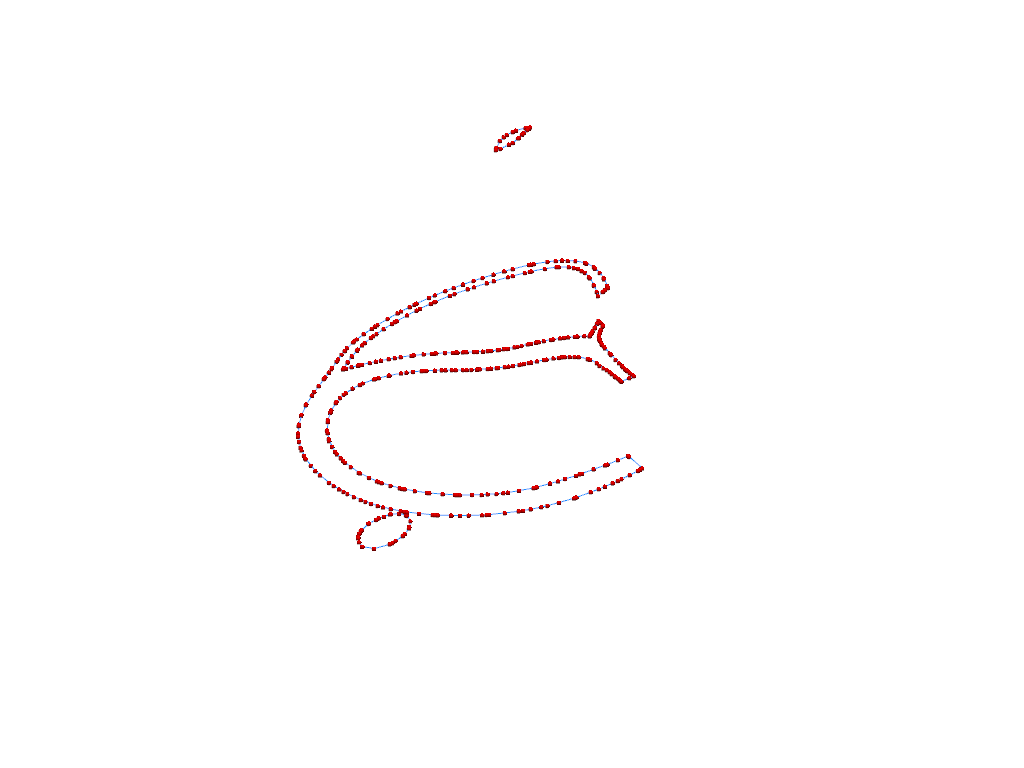

In [164]:
slices = mesh_ED.slice_along_axis(n=3, axis="z")
data = point_cloud(slices)
p = pv.Plotter()
p.add_mesh(data, render_points_as_spheres=True, color = 'red')
p.add_mesh(slices, color = 'dodgerblue', show_edges = True)
p.show()

In [165]:
alpha_true = np.array([0.0,0.0,-1.5, 0.0, 0.0])
pc = h5.File('UKBRVLV.h5', 'r')
data_points = data.points
modes = 5
num_iter = 100

print('// Algoritmo con gradiente descendiente //')
alpha_opt_gd_3, loss_rec_gd_3, loss_real_rec_gd_3 = ATLAS_ICP(data_points, pc, n_modes=modes, N_iter=num_iter, lr=0.2)
opt_points_gd_3 = create_heart_ATLAS(alpha_opt_gd_3, pc)
err_real_gd_3 = loss(alpha_true, opt_points_gd_3, pc)
print('Error real: ' + str(err_real_gd_3))

print('')
print('// Algoritmo con mínimos cuadrados de numpy //')
alpha_opt_ls_3, loss_rec_ls_3, loss_real_rec_ls_3  = ATLAS_ICP_LS(data_points, pc, n_modes=modes, N_iter=num_iter)
opt_points_ls_3 = create_heart_ATLAS(alpha_opt_ls_3, pc)
err_real_ls_3 = loss(alpha_true, opt_points_ls_3, pc)
print('Error real: ' + str(err_real_ls_3))

// Algoritmo con gradiente descendiente //
Valor de alpha inicial: [0. 0. 0. 0. 0.]
Valor de alpha final: [ 0.04709364 -0.09334989 -1.41252655 -0.07640348 -0.01341   ]
Loss mínimo:0.6850193623024073
Error real: 0.020823129660548688

// Algoritmo con mínimos cuadrados de numpy //
Valor de alpha inicial: [0. 0. 0. 0. 0.]
Valor de alpha final: [ 0.03134828 -0.02649407 -1.44497355 -0.04636088  0.00959011]
Loss mínimo:0.6830324951876304
Error real: 0.009422848238504445


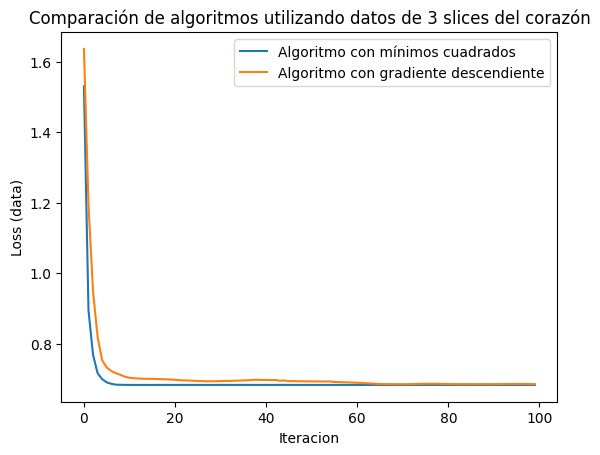

In [167]:
plt.plot(range(num_iter), loss_rec_ls_3, label = 'Algoritmo con mínimos cuadrados')
plt.plot(range(num_iter), loss_rec_gd_3, label = 'Algoritmo con gradiente descendiente')
plt.title('Comparación de algoritmos utilizando datos de 3 slices del corazón')
plt.xlabel('Iteracion')
plt.ylabel('Loss (data)')
plt.legend()
plt.show()

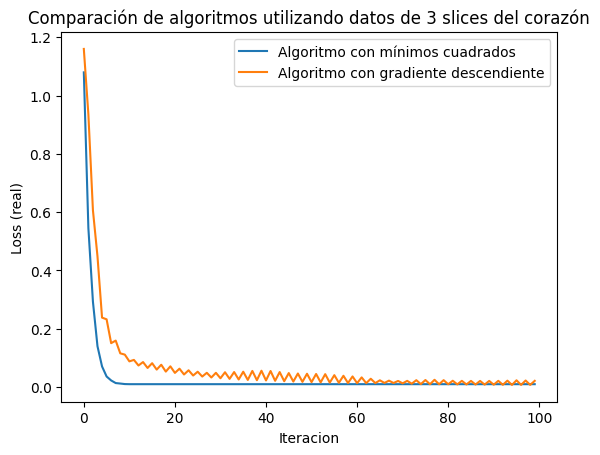

In [168]:
plt.plot(range(num_iter), loss_real_rec_ls_3, label = 'Algoritmo con mínimos cuadrados')
plt.plot(range(num_iter), loss_real_rec_gd_3, label = 'Algoritmo con gradiente descendiente')
plt.title('Comparación de algoritmos utilizando datos de 3 slices del corazón')
plt.xlabel('Iteracion')
plt.ylabel('Loss (real)')
plt.legend()
plt.show()

## Prueba usando 1 slice

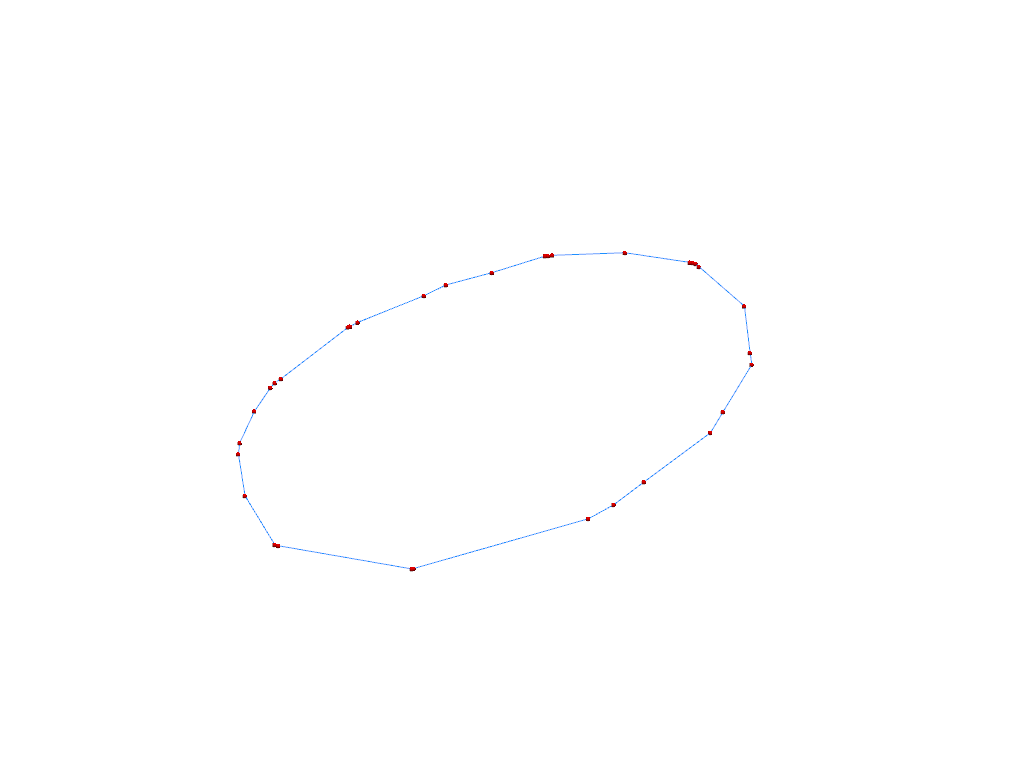

In [198]:
slices = mesh_ED.slice_along_axis(n=1, axis="z")
data = point_cloud(slices)
p = pv.Plotter()
p.add_mesh(data, render_points_as_spheres=True, color = 'red')
p.add_mesh(slices, color = 'dodgerblue', show_edges = True)
p.show()

In [199]:
alpha_true = np.array([0.0,0.0,-1.5, 0.0, 0.0])
pc = h5.File('UKBRVLV.h5', 'r')
data_points = data.points
modes = 5
num_iter = 100

print('// Algoritmo con gradiente descendiente //')
alpha_opt_gd_1, loss_rec_gd_1, loss_real_rec_gd_1 = ATLAS_ICP(data_points, pc, n_modes=modes, N_iter=num_iter, lr=0.2)
opt_points_gd_1 = create_heart_ATLAS(alpha_opt_gd_1, pc)
err_real_gd_1 = loss(alpha_true, opt_points_gd_1, pc)
print('Error real: ' + str(err_real_gd_1))

print('')
print('// Algoritmo con mínimos cuadrados de numpy //')
alpha_opt_ls_1, loss_rec_ls_1, loss_real_rec_ls_1  = ATLAS_ICP_LS(data_points, pc, n_modes=modes, N_iter=num_iter)
opt_points_ls_1 = create_heart_ATLAS(alpha_opt_ls_1, pc)
err_real_ls_1 = loss(alpha_true, opt_points_ls_1, pc)
print('Error real: ' + str(err_real_ls_1))

// Algoritmo con gradiente descendiente //
Valor de alpha inicial: [0. 0. 0. 0. 0.]
Valor de alpha final: [-0.11625528 -0.03883517 -1.27669376  0.29743908 -0.64366339]
Loss mínimo:0.438543124107465
Error real: 0.48082650638461655

// Algoritmo con mínimos cuadrados de numpy //
Valor de alpha inicial: [0. 0. 0. 0. 0.]
Valor de alpha final: [-1.45021417e-03  5.28553081e-01 -1.93659964e+00  2.70538612e-01
  9.02275253e-03]
Loss mínimo:0.2748859343140897
Error real: 0.10855506382922618


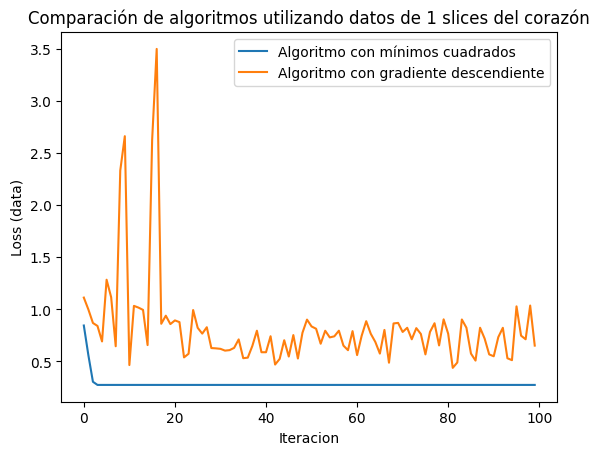

In [200]:
plt.plot(range(num_iter), loss_rec_ls_1, label = 'Algoritmo con mínimos cuadrados')
plt.plot(range(num_iter), loss_rec_gd_1, label = 'Algoritmo con gradiente descendiente')
plt.title('Comparación de algoritmos utilizando datos de 1 slices del corazón')
plt.xlabel('Iteracion')
plt.ylabel('Loss (data)')
plt.legend()
plt.show()

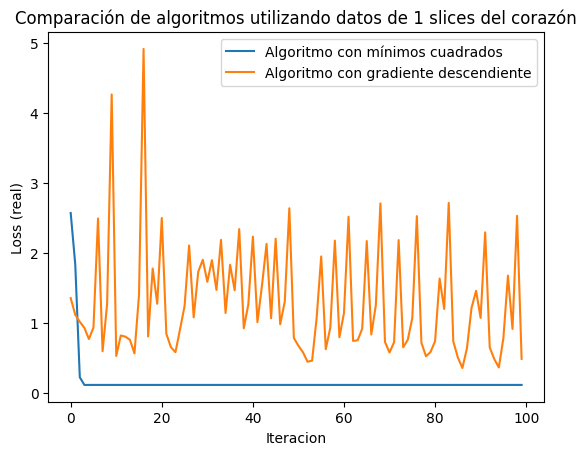

In [201]:
plt.plot(range(num_iter), loss_real_rec_ls_1, label = 'Algoritmo con mínimos cuadrados')
plt.plot(range(num_iter), loss_real_rec_gd_1, label = 'Algoritmo con gradiente descendiente')
plt.title('Comparación de algoritmos utilizando datos de 1 slices del corazón')
plt.xlabel('Iteracion')
plt.ylabel('Loss (real)')
plt.legend()
plt.show()

## Comparación final

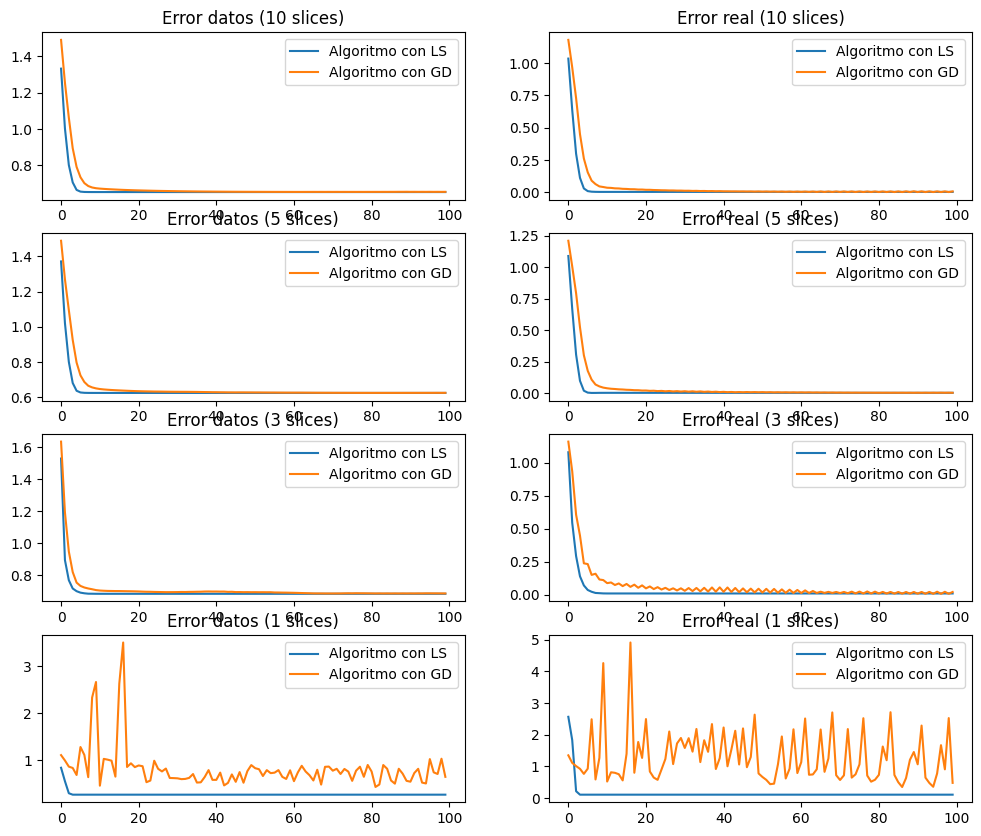

In [204]:
ran = range(num_iter)
fig, axs = plt.subplots(4, 2)
fig.set_size_inches((12, 10))

axs[0, 0].plot(ran, loss_rec_ls_10, label = 'Algoritmo con LS' )
axs[0, 0].plot(ran, loss_rec_gd_10, label = 'Algoritmo con GD')
axs[0, 0].legend()
axs[0, 0].set_title('Error datos (10 slices)')
axs[0, 1].plot(ran, loss_real_rec_ls_10, label = 'Algoritmo con LS' )
axs[0, 1].plot(ran, loss_real_rec_gd_10, label = 'Algoritmo con GD')
axs[0, 1].set_title('Error real (10 slices)')
axs[0, 1].legend()
axs[1, 0].plot(ran, loss_rec_ls_5, label = 'Algoritmo con LS' )
axs[1, 0].plot(ran, loss_rec_gd_5, label = 'Algoritmo con GD')
axs[1, 0].legend()
axs[1, 0].set_title('Error datos (5 slices)')
axs[1, 1].plot(ran, loss_real_rec_ls_5, label = 'Algoritmo con LS' )
axs[1, 1].plot(ran, loss_real_rec_gd_5, label = 'Algoritmo con GD')
axs[1, 1].set_title('Error real (5 slices)')
axs[1, 1].legend()
axs[2, 0].plot(ran, loss_rec_ls_3, label = 'Algoritmo con LS' )
axs[2, 0].plot(ran, loss_rec_gd_3, label = 'Algoritmo con GD')
axs[2, 0].legend()
axs[2, 0].set_title('Error datos (3 slices)')
axs[2, 1].plot(ran, loss_real_rec_ls_3, label = 'Algoritmo con LS' )
axs[2, 1].plot(ran, loss_real_rec_gd_3, label = 'Algoritmo con GD')
axs[2, 1].set_title('Error real (3 slices)')
axs[2, 1].legend()
axs[3, 0].plot(ran, loss_rec_ls_1, label = 'Algoritmo con LS' )
axs[3, 0].plot(ran, loss_rec_gd_1, label = 'Algoritmo con GD')
axs[3, 0].legend()
axs[3, 0].set_title('Error datos (1 slices)')
axs[3, 1].plot(ran, loss_real_rec_ls_1, label = 'Algoritmo con LS' )
axs[3, 1].plot(ran, loss_real_rec_gd_1, label = 'Algoritmo con GD')
axs[3, 1].set_title('Error real (1 slices)')
axs[3, 1].legend()


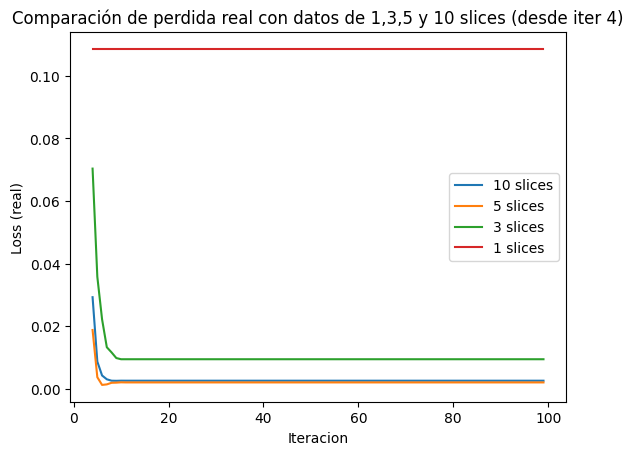

In [209]:
cut = 4
plt.plot(ran[cut:], loss_real_rec_ls_10[cut:], label = '10 slices')
plt.plot(ran[cut:], loss_real_rec_ls_5[cut:], label = '5 slices')
plt.plot(ran[cut:], loss_real_rec_ls_3[cut:], label = '3 slices')
plt.plot(ran[cut:], loss_real_rec_ls_1[cut:], label = '1 slices')
plt.title('Comparación de perdida real con datos de 1,3,5 y 10 slices (desde iter 4)')
plt.xlabel('Iteracion')
plt.ylabel('Loss (real)')
plt.legend()
plt.show()

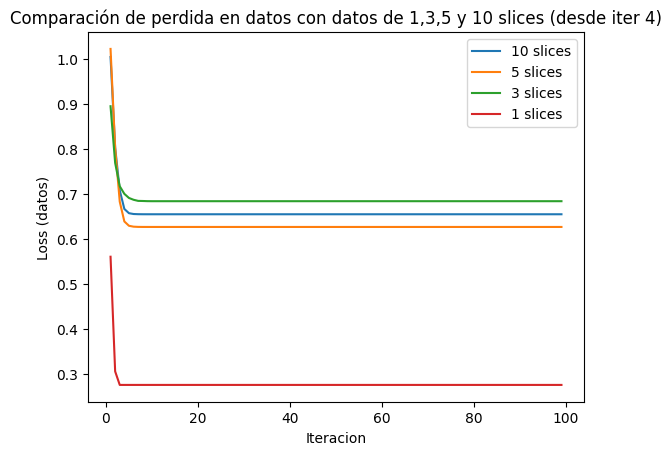

In [212]:
cut = 1
plt.plot(ran[cut:], loss_rec_ls_10[cut:], label = '10 slices')
plt.plot(ran[cut:], loss_rec_ls_5[cut:], label = '5 slices')
plt.plot(ran[cut:], loss_rec_ls_3[cut:], label = '3 slices')
plt.plot(ran[cut:], loss_rec_ls_1[cut:], label = '1 slices')
plt.title('Comparación de perdida en datos con datos de 1,3,5 y 10 slices (desde iter 4)')
plt.xlabel('Iteracion')
plt.ylabel('Loss (datos)')
plt.legend()
plt.show()